In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import pickle
image_dir = os.path.join('C:/Users/dell/Downloads/emotion_detection', "img")

face_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()

current_id = 0
label_ids = {}
y_labels = []
x_train = []

for root, dirs, files in os.walk(image_dir):
	for file in files:
		if file.endswith("png") or file.endswith("jpg"):
			path = os.path.join(root, file)
			label = os.path.basename(root).replace(" ", "-").lower()
			print(label, path)
			if not label in label_ids:
				label_ids[label] = current_id
				current_id += 1
			id_ = label_ids[label]
			pil_image = Image.open(path).convert("L") # grayscale
			size = (550, 550)
			final_image = pil_image.resize(size, Image.ANTIALIAS)
			image_array = np.array(final_image, "uint8")
			faces = face_cascade.detectMultiScale(image_array, scaleFactor=1.5, minNeighbors=5)

			for (x,y,w,h) in faces:
				roi = image_array[y:y+h, x:x+w]
				x_train.append(roi)
				y_labels.append(id_)



with open("face-labels.pickle", 'wb') as f:
	pickle.dump(label_ids, f)

recognizer.train(x_train, np.array(y_labels))
recognizer.save("face-trainner.yml")

akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (1) - Copy.jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (1).jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (2) - Copy.jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (2).jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (3) - Copy.jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download (6).jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download - Copy.jpg
akshay C:/Users/dell/Downloads/emotion_detection\img\akshay\download.jpg
amir C:/Users/dell/Downloads/emotion_detection\img\amir\download (1).jpg
amir C:/Users/dell/Downloads/emotion_detection\img\amir\download (2).jpg
amir C:/Users/dell/Downloads/emotion_detection\img\amir\download (3).jpg
amir C:/Users/dell/Downloads/emotion_detection\img\amir\download (4).jpg
amir C:/Users/dell/Downloads/emotion_detection\img\amir\download (5).jpg

In [2]:
import matplotlib.pyplot as plt

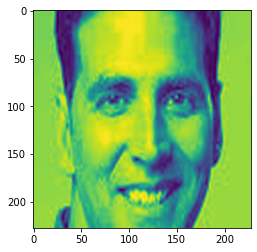

In [3]:
imgplot = plt.imshow(x_train[0])

In [4]:
len(y_labels)

32

In [5]:
label_ids

{'akshay': 0, 'amir': 1, 'hritik': 2, 'salman': 3, 'shahrukh': 4}

In [6]:
y_labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]